In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from sklearn import decomposition
from sklearn import manifold
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn import metrics
from sklearn import cluster

In [15]:
dfcl = pd.read_csv('dataCNN.csv')

# CNN

## VGG16

In [16]:
# Charger le modèle VGG16
model = VGG16(weights='imagenet', include_top=False)
model.summary()

# Chemin vers le dossier contenant les images
folder_path = 'C:/Users/boukh/OneDrive/Bureau/OpenClassRooms/Projet 6 openclassroom/Images/'
images = os.listdir(folder_path)

# Parcourir chaque image du dossier
for img_name in images:
    img_path = os.path.join(folder_path, img_name)
    
    # Charger l'image et la prétraiter
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    # Utiliser VGG16 pour extraire les caractéristiques de l'image
    vgg16_feature = model.predict(img_data)

    # Afficher la forme du tableau de caractéristiques extraites
    print(f"For image {img_name}, feature shape is {vgg16_feature.shape}")


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

1/1 [==============================] - 0s 71ms/step
For image 09f9f9b420edea2f39c0dc3c24d5be07.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 65ms/step
For image 0a8a1e9c6659361c0c2b247f8a6471d0.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 0abfcbe0e17dd50c4cf5fb1d6037d514.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 66ms/step
For image 0ae859a69c7608d8197c3ba8c37bc6ec.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 0b793c1727ef52285a25dedf8b86626b.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image 0b852704f2002f8865a68818ad4951da.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 65ms/step
For image 0b8c4bc35aee94

1/1 [==============================] - 0s 72ms/step
For image 2c475daafe597ed93c1e27fcaa38d8cc.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 2c8912b849cf73676d025aa99203b6d1.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image 2cbad7ead8eb8dd92823b9f525c87b9c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 2cc24452688ed35dfbff566e22e53c95.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 87ms/step
For image 2d4f1232af970bd19881ceacad6ccfe3.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 2d50e4c6ccf8befe9335ac8f97a11712.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 2e3586dc60df258c5478446d65a317d2.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 79ms/step
For image 2e474c49a7dfe7

1/1 [==============================] - 0s 66ms/step
For image 49852d7f69839e0b1006adc55d56938a.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image 49f7763dc9c7ece284a1ae27166f8c6c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 4a1b23dacd7d2a9ec7414f7159f25a48.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 4aa047f14885c74f155ce5f973e14dff.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 4b03cdfc7d1135c972e5c620dd7da66c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 101ms/step
For image 4b0e6f200426b1db8824b2ca0c59ecfa.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image 4b500e244f11a

C:\Users\boukh\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
For image 5518124b75d6c6dfee4c2e4c0cfa716a.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 55195de3873fffaa9e37b041533d7305.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 87ms/step
For image 5531b9f454e2d75cfe00c3f795e06de5.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 73ms/step
For image 553aa0252537751d153e7c50029f0242.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 55b85ea15a1536d46b7190ad6fff8ce7.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image 55ce1309b69e1912d2fd60a3ee3f351b.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 568f331e1039bf2e0635b899c2b3248f.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 5749bae8ccead7

1/1 [==============================] - 0s 67ms/step
For image 7241df1acae1fac892c692097ea3fb98.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 724e6eb7edc83eb48b6492d12e940ebd.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 7264f56639c8c54158b94ced769082c8.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 726de30d1473ecb9641c1cd5286b6344.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 729864e0d25e06cbf68561529bcdd4f0.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 66ms/step
For image 72cbc043d14ee578c789c9fab3c43cdd.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image 72db37ec42ee76d79cf395221e0f4cce.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 66ms/step
For image 733aa1e801a139

1/1 [==============================] - 0s 74ms/step
For image 8c90f3ca64ea1a8ce104c3c3f5fc173f.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 8ccc970bf4c55e9b2710d5319161c357.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 8d1abb3504a19ab41e7d8b8b1d5dd839.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 8e8f5dc78f80eff3c77a9714303f59d2.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 66ms/step
For image 8e94fbcd81112a21860355b3b11cf52d.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image 8e961e4fd248c9496ca54808d2d2b25f.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image 8ec6ee9814a27423e66c3c9ea26f77aa.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image 8ed6faebe08774

1/1 [==============================] - 0s 69ms/step
For image a67d4b8df18ac476cd1b0bbd80e589a4.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image a6c820b76bc29bbe2d85eecad3de03f8.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image a70ea60f971825b2eb57261029f317ec.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image a76bf8400b3dbcdbe5a5678f4a8ea0f6.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image a79117ea49a0533f641facdb4c99f502.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 71ms/step
For image a7a294ddbcd9bbbc46c034079529c17c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image a7bd63ef1d3b345d7f9a162865bb7c0d.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image a85a7dbd31267a

1/1 [==============================] - 0s 69ms/step
For image c8f42da0f9f695f07067676eae4135c8.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image c91f9dc1fdd8b4d60c6b2a2b607e3e8f.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image c943647eee4de99fc1b4e233b9a7f47d.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image c9531b92270ef77516d5b5b7ba2568e9.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image c997312abfa36281d41366cb4a3b908e.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image c9c4720bca91b8ce27d8190a7c4c139c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image ca82e1f23bb6cac66a32fce1c22534a3.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 70ms/step
For image caabe6014b914f

1/1 [==============================] - 0s 69ms/step
For image ea42376c9c52752d9d01bba12eb2999b.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 67ms/step
For image ea82cb68a6e79d3c10fe9c4255c6a508.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 80ms/step
For image ead122f4b1da293eb2d719baf104dfc9.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 65ms/step
For image eaed0897074ee52230ff6c6d73c18dd4.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image eaf55e90d0e4295cb84cb0276e78c35c.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 69ms/step
For image ec590694e8bf85f75c9200cf418127aa.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image ecb5bba9a5984d2b35b8ac3f56056c67.jpg, feature shape is (1, 7, 7, 512)
1/1 [==============================] - 0s 68ms/step
For image ed139e0d1b5c97

In [17]:
vgg16_feature_list = []

for img_path in dfcl["image"]:
    
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 70ms/step


In [18]:
# Dimension du dataset avant et après réduction de dimension avec un PCA
print("Dimensions dataset avant réduction PCA : ", vgg16_feature_list_np.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(vgg16_feature_list_np)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 25088)
Dimensions dataset après réduction PCA :  (1050, 940)


In [25]:

# Création de l'objet t-SNE avec les paramètres spécifiés
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)

# Application du t-SNE aux données
im_features_tsne = tsne.fit_transform(feat_pca)

# Création d'un DataFrame avec les résultats
df_tsne = pd.DataFrame(im_features_tsne, columns=['tsne1', 'tsne2'])

# Ajout des étiquettes de classe au DataFrame
df_tsne["class"] = dfcl['subcategory_1']

print(df_tsne.shape)


(1050, 3)


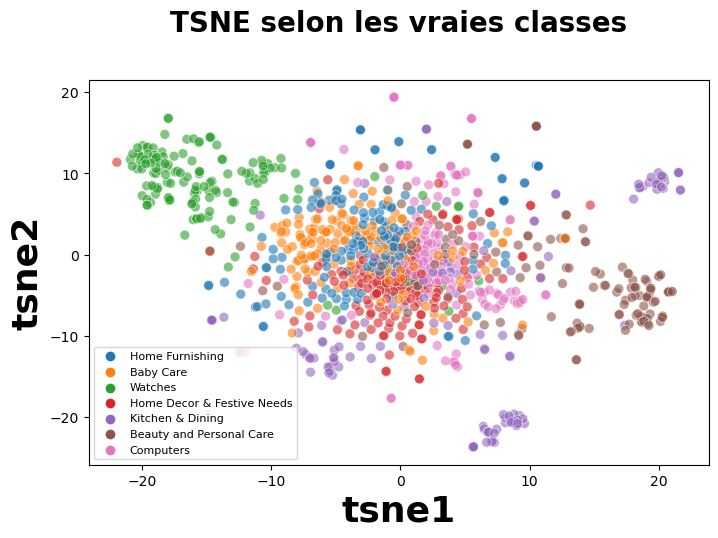

In [26]:

# Affichage selon les vraies classes
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 8},loc='best') 


plt.show()

In [21]:
dfcl

,image,subcategory_1,label
0,Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,Images/d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,Images/fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,Images/5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [29]:


cls = cluster.KMeans(n_clusters=7, random_state=0)
cls.fit(im_features_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\boukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


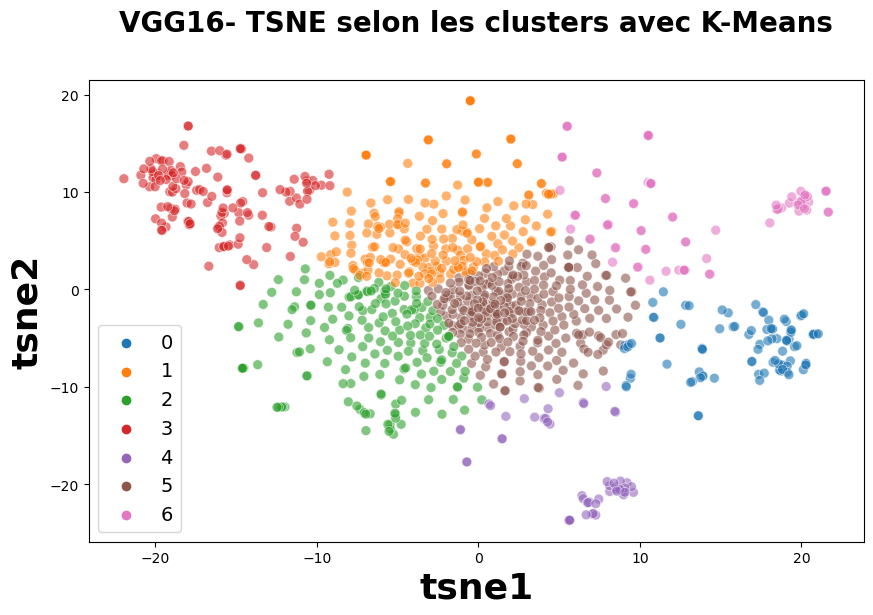

ARI :  0.23216561284291162


In [31]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('VGG16- TSNE selon les clusters avec K-Means', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = dfcl["subcategory_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Classification supervisée


### Création du modèle de classification

In [32]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

In [33]:
### Approche préparation initiale des images

In [34]:
# Pour mélanger les images, classées initalement par classe
data_a = dfcl.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:

def image_prep_fct(data) :
    prepared_images = []
    for image_num in range(len(dfcl['image'])) :
        img = (load_img(
            dfcl['image'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(dfcl)
print(images_np.shape)
images_np_test = image_prep_fct(dfcl)
print(images_np_test.shape)

(1050, 224, 224, 3)
(1050, 224, 224, 3)


In [37]:


X = images_np
y = to_categorical(dfcl['label'])

X_test = images_np_test
y_test = to_categorical(dfcl['label'])

y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(787, 224, 224, 3)

In [40]:
# Création du modèle


model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
# Entraîner sur les données d'entraînement (X_train, y_train)
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 4.3937 - accuracy: 0.4854
Epoch 1: val_loss improved from inf to 1.46477, saving model to .\model1_best_weights.h5
13/13 [==============================] - 44s 3s/step - loss: 4.3937 - accuracy: 0.4854 - val_loss: 1.4648 - val_accuracy: 0.7376
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 1.7081 - accuracy: 0.7230
Epoch 2: val_loss improved from 1.46477 to 1.23234, saving model to .\model1_best_weights.h5
13/13 [==============================] - 45s 3s/step - loss: 1.7081 - accuracy: 0.7230 - val_loss: 1.2323 - val_accuracy: 0.7452
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 1.1116 - accuracy: 0.7738
Epoch 3: val_loss improved from 1.23234 to 1.12141, saving model to .\model1_best_weights.h5
13/13 [==============================] - 44s 3s/step - loss: 1.1116 - accuracy: 0.7738 - val_loss: 1.1214 - val_accuracy: 0.7719
Epoch 4/50
13/13 [==============================] - ETA:

In [42]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

25/25 [==============================] - 32s 1s/step - loss: 0.0046 - accuracy: 1.0000
Training Accuracy: 1.0000

9/9 [==============================] - 11s 1s/step - loss: 1.0349 - accuracy: 0.8365
Validation Accuracy:  0.8365


In [43]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8213
Test Accuracy       :  0.9543


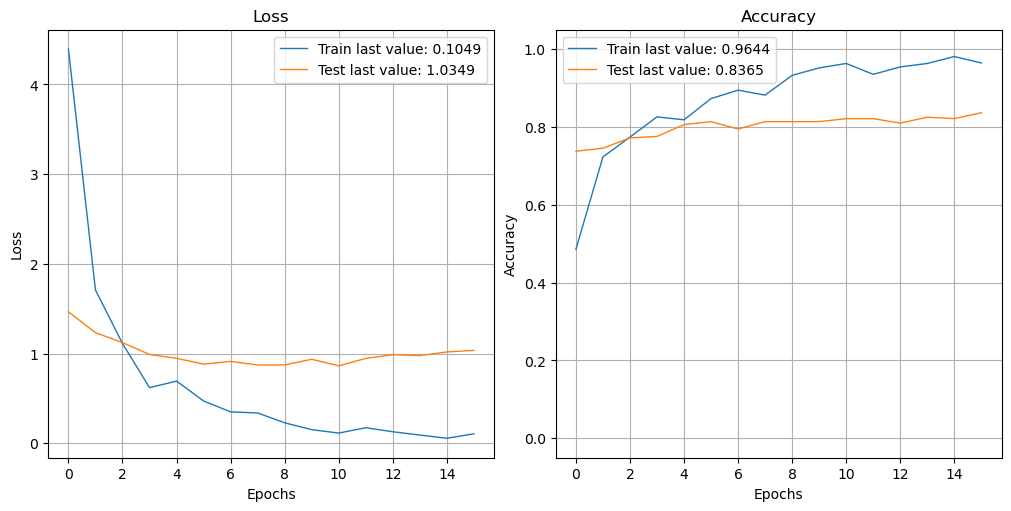

In [44]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()